### Load csv file

In [1]:
pip install pandas-profiling


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade matplotlib

  Using cached matplotlib-3.9.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.0
    Uninstalling matplotlib-3.6.0:
ERROR: Could not install packages due to an OSError: [Errno 30] Read-only file system: '/shared-libs/python3.9/py/lib/python3.9/site-packages/__pycache__/pylab.cpython-39.pyc'


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Fixing the import issue with pydantic in ProfileReport
# Updating the ProfileReport import following the migration instructions provided in the error message

import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

In [4]:
df = pd.read_csv('data.csv', encoding= 'unicode_escape')
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

#### Using the ProfileReport of Pandas to get an overview of the data and help understand the data clearly. Then, processing, cleaning, and analyzing data easier

In [5]:
df_check = ProfileReport(df)
df_check.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Reprocessing

#### Double check missing value on dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### 2 columns with null values are Description and CustomerID. These are the special value that is hard to fill in or without alternative methods to handle them, so they will completely eliminate them.

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### Drop NA values

In [8]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


#### There are several types of peculiar transactions and list all special Stock Codes

In [9]:
list_special_codes = df[df['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
list_special_codes

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK'],
      dtype=object)

In [10]:
df[df['StockCode'].apply(lambda x: x in list_special_codes)]
df = df[~df['StockCode'].isin(list_special_codes)].sort_index()
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [11]:
df['Total Price'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64[ns]')
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  Total Price  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom        15.30  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom        22.00  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
...                    ...        ...         ...             ...          ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France        10.20  
541905 2011-12-09 12:50:00       2.10     12680.0          France        12.60  
541906 2011-12-09 12:50:00       4.15     12680.0          France        16.60  
541907 2011-12-09 12:50:00       4.15     12680.0          France        16.60  
541908 2011-12-09 12:50:00       4.95     12680.0          France        14.85  

[404909 rows x 9 columns]

#### In this dataset, there are transactions where the customer cancels the order. Its means that the transactions when the customer orders must also be processed or dropped according to the canceled transactions. This is to ensure that revenue statistics will not be affected by those transactions

In [12]:
df1 = df.groupby(["Description","CustomerID","Country",])["Total Price"].sum().reset_index()
df1

Description  CustomerID         Country  \
0          4 PURPLE FLOCK DINNER CANDLES     12937.0  United Kingdom   
1          4 PURPLE FLOCK DINNER CANDLES     12940.0  United Kingdom   
2          4 PURPLE FLOCK DINNER CANDLES     12953.0  United Kingdom   
3          4 PURPLE FLOCK DINNER CANDLES     13949.0  United Kingdom   
4          4 PURPLE FLOCK DINNER CANDLES     14071.0  United Kingdom   
...                                  ...         ...             ...   
268434  ZINC WIRE SWEETHEART LETTER TRAY     17530.0  United Kingdom   
268435  ZINC WIRE SWEETHEART LETTER TRAY     17706.0  United Kingdom   
268436  ZINC WIRE SWEETHEART LETTER TRAY     17812.0  United Kingdom   
268437  ZINC WIRE SWEETHEART LETTER TRAY     17835.0  United Kingdom   
268438  ZINC WIRE SWEETHEART LETTER TRAY     17841.0  United Kingdom   

        Total Price  
0              2.55  
1              2.55  
2             15.30  
3              9.48  
4              0.79  
...             ...  
268434         3.75  
268435        37.50  
268436         3.75  
268437         6.25  
268438        11.25  

[268439 rows x 4 columns]

In [13]:
df_2 = df[["InvoiceNo", "StockCode","Description", "InvoiceDate", "CustomerID", "Quantity"]].sort_values(by="CustomerID",ascending=True)
df_merge = pd.merge(df1,df_2,how='outer')
df_merge

Description  CustomerID         Country  \
0          4 PURPLE FLOCK DINNER CANDLES     12937.0  United Kingdom   
1          4 PURPLE FLOCK DINNER CANDLES     12940.0  United Kingdom   
2          4 PURPLE FLOCK DINNER CANDLES     12953.0  United Kingdom   
3          4 PURPLE FLOCK DINNER CANDLES     13949.0  United Kingdom   
4          4 PURPLE FLOCK DINNER CANDLES     14071.0  United Kingdom   
...                                  ...         ...             ...   
404919  ZINC WIRE SWEETHEART LETTER TRAY     17706.0  United Kingdom   
404920  ZINC WIRE SWEETHEART LETTER TRAY     17812.0  United Kingdom   
404921  ZINC WIRE SWEETHEART LETTER TRAY     17835.0  United Kingdom   
404922  ZINC WIRE SWEETHEART LETTER TRAY     17841.0  United Kingdom   
404923  ZINC WIRE SWEETHEART LETTER TRAY     17841.0  United Kingdom   

        Total Price InvoiceNo StockCode         InvoiceDate  Quantity  
0              2.55    578551    72800B 2011-11-24 15:05:00         1  
1              2.55    571270    72800B 2011-10-16 12:09:00         1  
2             15.30    579533    72800B 2011-11-30 09:24:00         6  
3              9.48    581015    72800B 2011-12-07 09:35:00        12  
4              0.79    580876    72800B 2011-12-06 12:12:00         1  
...             ...       ...       ...                 ...       ...  
404919        37.50    560035     23137 2011-07-14 13:41:00         4  
404920         3.75    578521     23137 2011-11-24 14:06:00         1  
404921         6.25    581101     23137 2011-12-07 11:48:00         5  
404922        11.25    555110     23137 2011-05-31 14:34:00         2  
404923        11.25    577174     23137 2011-11-18 10:58:00         1  

[404924 rows x 8 columns]

In [14]:
df_negative = df1[df1["Total Price"] <= 0]
df_negative

Description  CustomerID         Country  \
159                    DOLLY GIRL BEAKER     12940.0  United Kingdom   
505      SET 2 TEA TOWELS I LOVE LONDON      15128.0  United Kingdom   
659               SPACEBOY BABY GIFT SET     15810.0  United Kingdom   
667               SPACEBOY BABY GIFT SET     16360.0  United Kingdom   
714                    TRELLIS COAT RACK     15993.0  United Kingdom   
...                                  ...         ...             ...   
267589       ZINC METAL HEART DECORATION     13394.0  United Kingdom   
267947  ZINC SWEETHEART WIRE LETTER RACK     17716.0  United Kingdom   
268245   ZINC T-LIGHT HOLDER STARS SMALL     17504.0  United Kingdom   
268264    ZINC TOP  2 DOOR WOODEN SHELF      14217.0  United Kingdom   
268268    ZINC TOP  2 DOOR WOODEN SHELF      14952.0  United Kingdom   

        Total Price  
159           -1.25  
505            0.00  
659            0.00  
667            0.00  
714            0.00  
...             ...  
267589         0.00  
267947         0.00  
268245         0.00  
268264         0.00  
268268       -59.80  

[2258 rows x 4 columns]

#### After calculating total price based on CustomerID and StockCode. Then, drop the data with total price <= 0 (because it includes unreasonable transactions with order cancellation data even though there is no previous order data)

In [15]:
df3 = df_merge[~df_merge["Total Price"].isin(df_negative["Total Price"])]
df3

Description  CustomerID         Country  \
0          4 PURPLE FLOCK DINNER CANDLES     12937.0  United Kingdom   
1          4 PURPLE FLOCK DINNER CANDLES     12940.0  United Kingdom   
2          4 PURPLE FLOCK DINNER CANDLES     12953.0  United Kingdom   
3          4 PURPLE FLOCK DINNER CANDLES     13949.0  United Kingdom   
4          4 PURPLE FLOCK DINNER CANDLES     14071.0  United Kingdom   
...                                  ...         ...             ...   
404919  ZINC WIRE SWEETHEART LETTER TRAY     17706.0  United Kingdom   
404920  ZINC WIRE SWEETHEART LETTER TRAY     17812.0  United Kingdom   
404921  ZINC WIRE SWEETHEART LETTER TRAY     17835.0  United Kingdom   
404922  ZINC WIRE SWEETHEART LETTER TRAY     17841.0  United Kingdom   
404923  ZINC WIRE SWEETHEART LETTER TRAY     17841.0  United Kingdom   

        Total Price InvoiceNo StockCode         InvoiceDate  Quantity  
0              2.55    578551    72800B 2011-11-24 15:05:00         1  
1              2.55    571270    72800B 2011-10-16 12:09:00         1  
2             15.30    579533    72800B 2011-11-30 09:24:00         6  
3              9.48    581015    72800B 2011-12-07 09:35:00        12  
4              0.79    580876    72800B 2011-12-06 12:12:00         1  
...             ...       ...       ...                 ...       ...  
404919        37.50    560035     23137 2011-07-14 13:41:00         4  
404920         3.75    578521     23137 2011-11-24 14:06:00         1  
404921         6.25    581101     23137 2011-12-07 11:48:00         5  
404922        11.25    555110     23137 2011-05-31 14:34:00         2  
404923        11.25    577174     23137 2011-11-18 10:58:00         1  

[400931 rows x 8 columns]

## Exploratory Data Analysis

#### Revenue generated by the sales for each day and the sales trend

In [16]:
general_trend = pd.DataFrame(data={'Date':pd.to_datetime(df["InvoiceDate"]).dt.date,
                                  'Total Price':df["Total Price"]})
general_trend = general_trend.groupby("Date")["Total Price"].sum()
general_trend = pd.DataFrame(general_trend)

In [17]:
dates = []
dates.append(pd.to_datetime("201012",format="%Y%m"))
dates += [pd.to_datetime("2011"+str(month),format="%Y%m") for month in range(1,12)]

In [18]:
rolling_days = general_trend.copy()
rolling_days["Total Price"] = rolling_days["Total Price"].rolling(window=30).mean() 

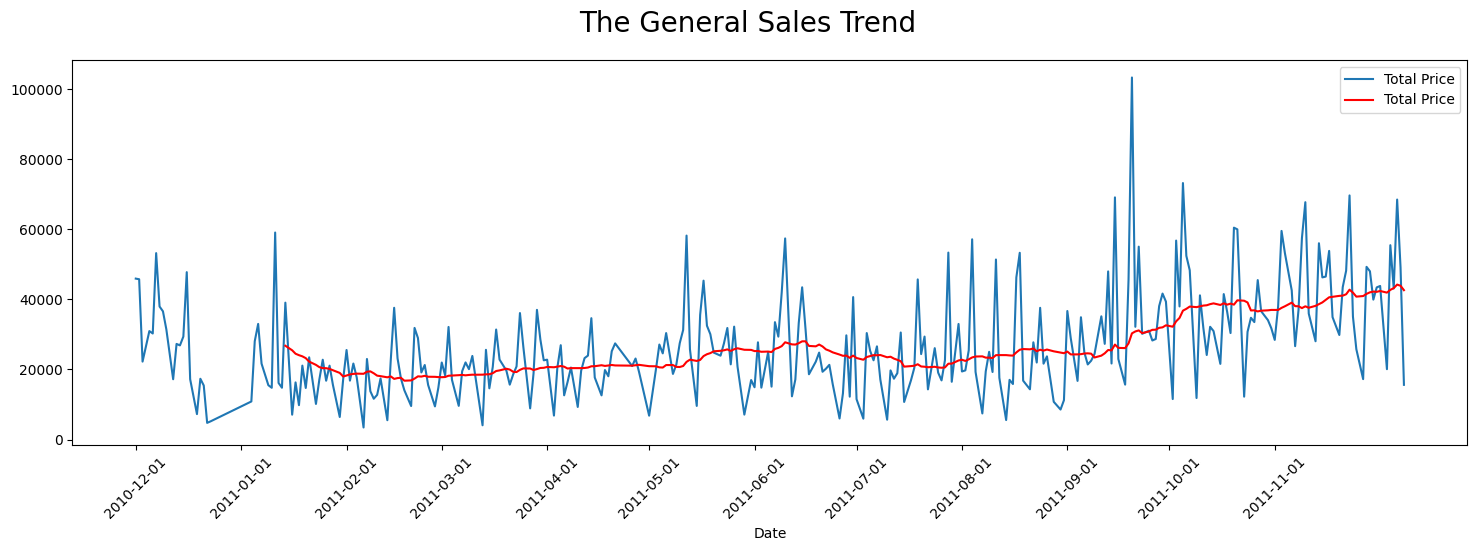

In [19]:
%matplotlib inline
plt.figure(figsize = (18,5)).suptitle('The General Sales Trend', fontsize=20)
sns.lineplot(data=general_trend)
sns.lineplot(data=rolling_days, palette=['red'])
plt.xticks(dates,rotation = 45)
plt.show()

#### After, I group all duplicate descriptions based on CustomerID, then, we join to the new column is All Description. Its prepare for RFM Analysis later

In [20]:
df_dup = df3[df3["CustomerID"].duplicated(keep=False)]
df3["All StockCode"] = df_dup.groupby(["InvoiceNo","CustomerID"])["StockCode"].transform(', '.join)
df3.head()

/tmp/ipykernel_206/1505957312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["All StockCode"] = df_dup.groupby(["InvoiceNo","CustomerID"])["StockCode"].transform(', '.join)


Description  CustomerID         Country  Total Price  \
0   4 PURPLE FLOCK DINNER CANDLES     12937.0  United Kingdom         2.55   
1   4 PURPLE FLOCK DINNER CANDLES     12940.0  United Kingdom         2.55   
2   4 PURPLE FLOCK DINNER CANDLES     12953.0  United Kingdom        15.30   
3   4 PURPLE FLOCK DINNER CANDLES     13949.0  United Kingdom         9.48   
4   4 PURPLE FLOCK DINNER CANDLES     14071.0  United Kingdom         0.79   

  InvoiceNo StockCode         InvoiceDate  Quantity  \
0    578551    72800B 2011-11-24 15:05:00         1   
1    571270    72800B 2011-10-16 12:09:00         1   
2    579533    72800B 2011-11-30 09:24:00         6   
3    581015    72800B 2011-12-07 09:35:00        12   
4    580876    72800B 2011-12-06 12:12:00         1   

                                       All StockCode  
0  72800B, 22150, 22077, 85177, 22588, 22816, 229...  
1  72800B, 85034A, 85034C, 85034B, 21615, 21615, ...  
2  72800B, 72800C, 23485, 23458, 48194, 23284, 48...  
3  72800B, 72800C, 22915, 84879, 22138, 23417, 22...  
4  72800B, 72800E, 72800C, 22438, 23417, 22068, 8...

#### After join all descriptions into the new column, we drop all redundant rows with duplicate

In [21]:
df_dup = df3[[ "InvoiceNo", "CustomerID","All StockCode","InvoiceDate", "Country"]].drop_duplicates()
df_dup.head()

InvoiceNo  CustomerID                                      All StockCode  \
0    578551     12937.0  72800B, 22150, 22077, 85177, 22588, 22816, 229...   
1    571270     12940.0  72800B, 85034A, 85034C, 85034B, 21615, 21615, ...   
2    579533     12953.0  72800B, 72800C, 23485, 23458, 48194, 23284, 48...   
3    581015     13949.0  72800B, 72800C, 22915, 84879, 22138, 23417, 22...   
4    580876     14071.0  72800B, 72800E, 72800C, 22438, 23417, 22068, 8...   

          InvoiceDate         Country  
0 2011-11-24 15:05:00  United Kingdom  
1 2011-10-16 12:09:00  United Kingdom  
2 2011-11-30 09:24:00  United Kingdom  
3 2011-12-07 09:35:00  United Kingdom  
4 2011-12-06 12:12:00  United Kingdom

In [22]:
df4 = df3.groupby(["InvoiceNo"])["Total Price"].sum().reset_index()
df4.head()

InvoiceNo  Total Price
0    536365      2506.04
1    536366       399.60
2    536367       684.53
3    536368       172.05
4    536369        53.55

In [23]:
df_dup2 = pd.merge(df_dup,df4,on='InvoiceNo')
df_dup2["InvoiceNo"] = df_dup2["InvoiceNo"].replace('C', '', regex=True)
df_dup2

InvoiceNo  CustomerID  \
0        578551     12937.0   
1        571270     12940.0   
2        579533     12953.0   
3        581015     13949.0   
4        580876     14071.0   
...         ...         ...   
21124    555267     16359.0   
21125    571319     17164.0   
21126    562050     14133.0   
21127    552135     14944.0   
21128    577361     13012.0   

                                           All StockCode         InvoiceDate  \
0      72800B, 22150, 22077, 85177, 22588, 22816, 229... 2011-11-24 15:05:00   
1      72800B, 85034A, 85034C, 85034B, 21615, 21615, ... 2011-10-16 12:09:00   
2      72800B, 72800C, 23485, 23458, 48194, 23284, 48... 2011-11-30 09:24:00   
3      72800B, 72800C, 22915, 84879, 22138, 23417, 22... 2011-12-07 09:35:00   
4      72800B, 72800E, 72800C, 22438, 23417, 22068, 8... 2011-12-06 12:12:00   
...                                                  ...                 ...   
21124                                              84836 2011-06-01 16:15:00   
21125                                              23145 2011-10-17 10:50:00   
21126                                              23144 2011-08-02 11:34:00   
21127                                              23144 2011-05-06 11:51:00   
21128                                              23137 2011-11-18 16:13:00   

              Country  Total Price  
0      United Kingdom       900.69  
1      United Kingdom       673.97  
2      United Kingdom       329.85  
3      United Kingdom       974.42  
4      United Kingdom       187.42  
...               ...          ...  
21124  United Kingdom       740.21  
21125  United Kingdom        21.85  
21126  United Kingdom        19.92  
21127  United Kingdom        59.76  
21128  United Kingdom        15.00  

[21129 rows x 6 columns]

#### Apply RFM analysis to group customers based on the Recency, Frequency and Monetary total of their recent transactions to identify the segment customers

In [24]:
most_recent_date = df_dup2["InvoiceDate"].max()
rfm_data = df_dup2.groupby(by='CustomerID').aggregate({
    'InvoiceDate' : lambda x: (most_recent_date - x.max()).days,
    'InvoiceNo' : lambda x: len(x),
    'Total Price' : lambda x: sum(x)
})
rfm_data.columns = ['Recency', 'Frequency', 'Monetary Total']
rfm_data.head()

Recency  Frequency  Monetary Total
CustomerID                                    
12347.0           1          7        11323.81
12348.0          74          4         2181.64
12349.0          18          1         1457.55
12350.0         309          1          294.40
12352.0          35          8         2122.87

#### Because the value between Frequently, Recency, and Monetary Total is too large, it must be scaled on the same standard

In [25]:
from sklearn.preprocessing import StandardScaler
rfm_data_scale = StandardScaler()
rfm_data_scale = rfm_data_scale.fit_transform(rfm_data) 
rfm_data_scale = rfm_data_scale.tolist()

df_rfm_data_scale = pd.DataFrame (rfm_data_scale, columns = ['Recency', 'Frequency', 'Monetary Total'])
df_rfm_data_scale

Recency  Frequency  Monetary Total
0    -0.895386   0.234345        0.080973
1    -0.163859  -0.098643       -0.087159
2    -0.725030  -0.431632       -0.100476
3     2.191056  -0.431632       -0.121867
4    -0.554675   0.345341       -0.088240
...        ...        ...             ...
4317  1.870387  -0.431632       -0.123960
4318  0.898358  -0.431632       -0.125795
4319 -0.835260  -0.209639       -0.123804
4320 -0.875344   1.233311        0.080547
4321 -0.484528  -0.209639       -0.076578

[4322 rows x 3 columns]

## Clustering by Kmeans

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

#### Before using Kmean, I have to determine the optimal K number, so I use Elbow method to find the optimal K 

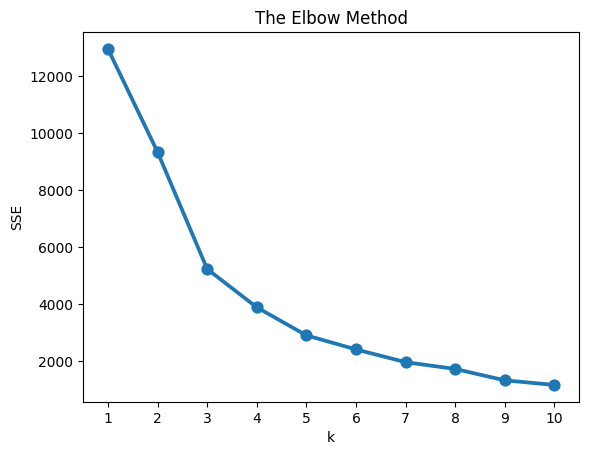

In [27]:
sse = {}

for k in range(1, 11):    
    kmeans = KMeans(n_clusters=k, random_state=1)    
    kmeans.fit(df_rfm_data_scale)    
    sse[k] = kmeans.inertia_ 
    
# Plot SSE for each value of k    
plt.title('The Elbow Method')
plt.xlabel('k'); 
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

on the graph above, k = 3 is optimal

In [28]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [29]:
y_predicted = km.fit_predict(df_rfm_data_scale[['Frequency', 'Monetary Total']]) 
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [30]:
rfm_data['cluster_Kmeans'] = y_predicted
rfm_data.head()

Recency  Frequency  Monetary Total  cluster_Kmeans
CustomerID                                                    
12347.0           1          7        11323.81               0
12348.0          74          4         2181.64               0
12349.0          18          1         1457.55               0
12350.0         309          1          294.40               0
12352.0          35          8         2122.87               0

In [31]:
rfm_data["cluster_Kmeans"].value_counts()

cluster_Kmeans
0    4286
1      32
2       4
Name: count, dtype: int64

In [32]:
rfm_data = rfm_data.reset_index()

In [33]:
rfm_data0 = rfm_data[rfm_data["cluster_Kmeans"] == 0]
rfm_data1 = rfm_data[rfm_data["cluster_Kmeans"] == 1]
rfm_data2 = rfm_data[rfm_data["cluster_Kmeans"] == 2]
rfm_data0.head()

CustomerID  Recency  Frequency  Monetary Total  cluster_Kmeans
0     12347.0        1          7        11323.81               0
1     12348.0       74          4         2181.64               0
2     12349.0       18          1         1457.55               0
3     12350.0      309          1          294.40               0
4     12352.0       35          8         2122.87               0

In [34]:
(lambda: DeepnoteChart(rfm_data0, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Frequency","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Monetary Total","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"size":{"sort":null,"type":"quantitative","field":"Monetary Total"},"color":{"sort":null,"type":"quantitative","field":"Recency","scale":{"scheme":"teals"}}}}]}],"title":"Group 0","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(rfm_data0, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Frequency","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Monetary Total","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"size":{"sort":null,"type":"quantitative","field":"Monetary Total"},"color":{"sort":null,"type":"quantitative","field":"Recency","scale":{"scheme":"teals"}}}}]}],"title":"Group 0","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}"""))()

##### As can be seen, with group 0, which is the group with the frequency of purchases, the revenue they generate is relatively stable and pretty high. It is a potential group of customers

In [35]:
## Group 1
rfm_data1.head()

CustomerID  Recency  Frequency  Monetary Total  cluster_Kmeans
54      12415.0       23         22       309810.78               1
98      12471.0        1         45       155947.88               1
322     12748.0        0        215       123333.74               1
441     12921.0        3         50        85690.88               1
477     12971.0        3         86        59230.66               1

In [36]:
(lambda: DeepnoteChart(rfm_data1, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Frequency","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Monetary Total","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"size":{"sort":null,"type":"quantitative","field":"Monetary Total"},"color":{"sort":null,"type":"quantitative","field":"Recency","scale":{"scheme":"teals"}}}}]}],"title":"Group 1","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(rfm_data1, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Frequency","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Monetary Total","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"size":{"sort":null,"type":"quantitative","field":"Monetary Total"},"color":{"sort":null,"type":"quantitative","field":"Recency","scale":{"scheme":"teals"}}}}]}],"title":"Group 1","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}"""))()

##### Group 1, with low purchase frequency and quite high recency. Most customers belong to this group, which is a group of regular, and revenue is not high

In [37]:
## Group 2
rfm_data2.head()

CustomerID  Recency  Frequency  Monetary Total  cluster_Kmeans
1682     14646.0        1         74      1917875.79               2
1871     14911.0        0        242      1276621.07               2
3716     17450.0        7         46       969646.22               2
4187     18102.0        0         60      1655153.96               2

In [38]:
(lambda: DeepnoteChart(rfm_data2, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Frequency","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Monetary Total","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"size":{"sort":null,"type":"quantitative","field":"Monetary Total"},"color":{"sort":null,"type":"quantitative","field":"Recency","scale":{"scheme":"teals"}}}}]}],"title":"Group 2","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(rfm_data2, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Frequency","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Monetary Total","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"size":{"sort":null,"type":"quantitative","field":"Monetary Total"},"color":{"sort":null,"type":"quantitative","field":"Recency","scale":{"scheme":"teals"}}}}]}],"title":"Group 2","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}"""))()

##### Group 2, the frequency of purchase is very high. This is a group have the fewest customers but highest frequency and create the most revenue. Should focus on this group as well as increase the conversion rate from another to this group

### Overview of all group

<AxesSubplot: xlabel='Frequency', ylabel='Monetary Total'>

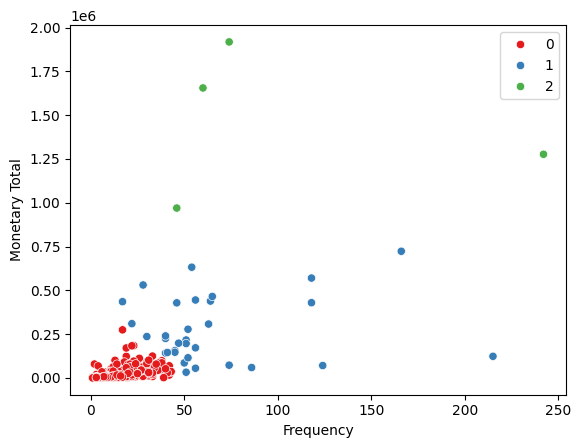

In [39]:
sns.scatterplot(rfm_data, x = "Frequency", y = "Monetary Total", hue = y_predicted, palette='Set1')

=> Most customers in group 2 have the most revenue. Besides that, group 0 is also a potential group can generate more revenue.

<AxesSubplot: xlabel='Recency', ylabel='Monetary Total'>

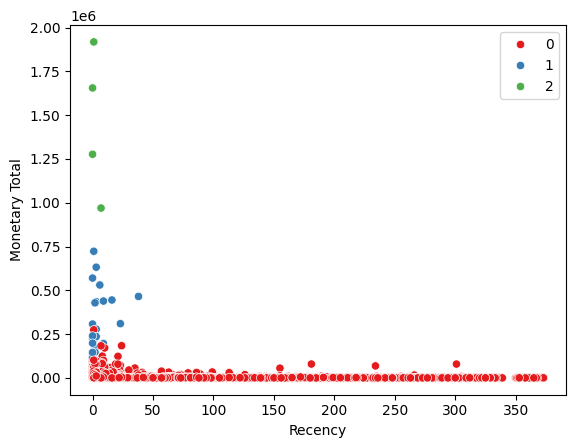

In [40]:
sns.scatterplot(rfm_data, x = "Recency", y = "Monetary Total", hue = y_predicted, palette='Set1')

=> The higher recency, the less revenue is generated. Both group 0 and 2 have good performance about less Recency and high Monetary Value.

<AxesSubplot: xlabel='Frequency', ylabel='Recency'>

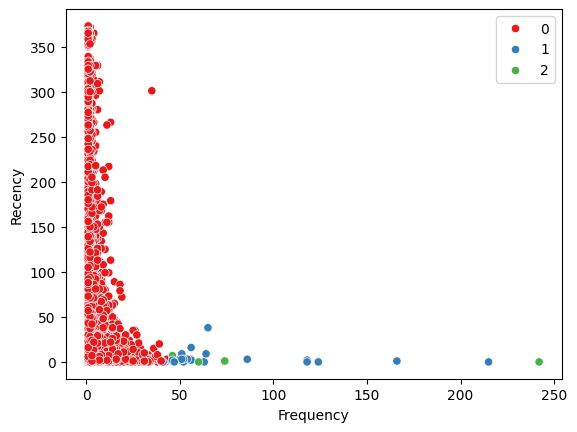

In [41]:
sns.scatterplot(rfm_data, x = "Frequency", y = "Recency", hue = y_predicted, palette='Set1')

=> Obviously, when a customer purchases with a high Frequency, Recency will be inversely proportional to this.

#### From those things:
+ Less Recency
+ High Frequency
+ High Monetary
=> Group 0 is a potential group that should be focusing on it, implement more preferential policies, and turn to Group 2 which is the group that generates the most revenue.

### Top 10 items bought the most

In [42]:
import matplotlib.cm

cmap = matplotlib.cm.get_cmap('Blues')

# Create a copy of the DataFrame
df_fpgrowth = df.copy()

# Drop columns with datetime64 type to avoid the TypeError
datetime_cols = df_fpgrowth.select_dtypes(include=['datetime64']).columns
df_fpgrowth = df_fpgrowth.drop(columns=datetime_cols)

df_fpgrowth["incident_count"] = 1 
df_fpgrowth = df_fpgrowth.groupby("Description").sum().sort_values("incident_count", ascending=False).reset_index()
df_fpgrowth

Description  \
0      WHITE HANGING HEART T-LIGHT HOLDER   
1                REGENCY CAKESTAND 3 TIER   
2                 JUMBO BAG RED RETROSPOT   
3           ASSORTED COLOUR BIRD ORNAMENT   
4                           PARTY BUNTING   
...                                   ...   
3883    CRYSTAL CHANDELIER T-LIGHT HOLDER   
3884       CROCHET LILAC/RED BEAR KEYRING   
3885                 LUNCH BAG RED SPOTTY   
3886  BLACK VINT ART DEC CRYSTAL BRACELET   
3887         BREAD BIN, DINER STYLE, MINT   

                                              InvoiceNo  \
0     5363655363735363755363905363945363965364015364...   
1     5364775365025365255365285365305365375365395365...   
2     5363865363905364095364645365225365265365425365...   
3     5363675363925363955364085364605364645365025365...   
4     5369565370655371285371425374205374405376915378...   
...                                                 ...   
3883                                             552813   
3884                                             578824   
3885                                             541220   
3886                                             575368   
3887                                             537217   

                                              StockCode  Quantity  UnitPrice  \
0     85123A85123A85123A85123A85123A85123A85123A8512...     34147    5985.12   
1     2242322423224232242322423224232242322423224232...     11555   23678.05   
2     85099B85099B85099B85099B85099B85099B85099B8509...     45066    3345.70   
3     8487984879848798487984879848798487984879848798...     35314    2383.46   
4     4756647566475664756647566475664756647566475664...     15027    6897.06   
...                                                 ...       ...        ...   
3883                                              23056         3       6.25   
3884                                              84550         1       1.65   
3885                                              20725       200       1.45   
3886                                             90065B         1       6.75   
3887                                              22849         4      14.95   

      CustomerID                                            Country  \
0     32213017.0  United KingdomUnited KingdomUnited KingdomUnit...   
1     28473438.0  United KingdomUnited KingdomUnited KingdomUnit...   
2     25396253.0  United KingdomUnited KingdomUnited KingdomUnit...   
3     21602517.0  United KingdomUnited KingdomUnited KingdomUnit...   
4     21766527.0  United KingdomFranceUnited KingdomUnited Kingd...   
...          ...                                                ...   
3883     15079.0                                     United Kingdom   
3884     17883.0                                     United Kingdom   
3885     14156.0                                               EIRE   
3886     14482.0                                     United Kingdom   
3887     15502.0                                     United Kingdom   

      Total Price  incident_count  
0        93823.85            2070  
1       132870.40            1905  
2        83236.76            1662  
3        56499.22            1418  
4        67687.53            1416  
...           ...             ...  
3883        18.75               1  
3884         1.65               1  
3885       290.00               1  
3886         6.75               1  
3887        59.80               1  

[3888 rows x 9 columns]

In [43]:
import plotly.express as px

df_fpgrowth["all"] = "Top 10 items" 
fig = px.treemap(df_fpgrowth.head(10), path=['all', "Description"], values='incident_count',
                  color=df_fpgrowth["incident_count"].head(10), hover_data=['Description'],
                  color_continuous_scale='Blues')
fig

## Data Prep for FPGrowth

#### Convert data to true and false values to use for association rules

In [44]:
df_preprocessing_fpgrowth = df3.groupby(['CustomerID', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('CustomerID')
df_preprocessing_fpgrowth

Description   4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
CustomerID                                                                    
12347.0                                 0.0                             0.0   
12348.0                                 0.0                             0.0   
12349.0                                 0.0                             0.0   
12350.0                                 0.0                             0.0   
12352.0                                 0.0                             0.0   
...                                     ...                             ...   
18280.0                                 0.0                             0.0   
18281.0                                 0.0                             0.0   
18282.0                                 0.0                             0.0   
18283.0                                 0.0                             0.0   
18287.0                                 0.0                             0.0   

Description   DOLLY GIRL BEAKER   I LOVE LONDON MINI BACKPACK  \
CustomerID                                                      
12347.0                     0.0                           0.0   
12348.0                     0.0                           0.0   
12349.0                     0.0                           0.0   
12350.0                     0.0                           0.0   
12352.0                     0.0                           0.0   
...                         ...                           ...   
18280.0                     0.0                           0.0   
18281.0                     0.0                           0.0   
18282.0                     0.0                           0.0   
18283.0                     0.0                           0.0   
18287.0                     0.0                           0.0   

Description   I LOVE LONDON MINI RUCKSACK   NINE DRAWER OFFICE TIDY  \
CustomerID                                                            
12347.0                               0.0                       0.0   
12348.0                               0.0                       0.0   
12349.0                               0.0                       0.0   
12350.0                               0.0                       0.0   
12352.0                               0.0                       0.0   
...                                   ...                       ...   
18280.0                               0.0                       0.0   
18281.0                               0.0                       0.0   
18282.0                               0.0                       0.0   
18283.0                               0.0                       0.0   
18287.0                               0.0                       0.0   

Description   OVAL WALL MIRROR DIAMANTE    RED SPOT GIFT BAG LARGE  \
CustomerID                                                           
12347.0                              0.0                       0.0   
12348.0                              0.0                       0.0   
12349.0                              0.0                       0.0   
12350.0                              0.0                       0.0   
12352.0                              0.0                       0.0   
...                                  ...                       ...   
18280.0                              0.0                       0.0   
18281.0                              0.0                       0.0   
18282.0                              0.0                       0.0   
18283.0                              0.0                       1.0   
18287.0                              0.0                       0.0   

Description   SET 2 TEA TOWELS I LOVE LONDON    SPACEBOY BABY GIFT SET  ...  \
CustomerID                                                              ...   
12347.0                                   0.0                      0.0  ...   
12348.0                                   0.0         

In [45]:
def num(x):
    if x == 0:
        return False
    if x >= 1:
        return True

df_for_fpgrowth = df_preprocessing_fpgrowth.applymap(num)
df_for_fpgrowth.head(10)

/tmp/ipykernel_206/2593456440.py:7: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



Description   4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
CustomerID                                                                    
12347.0                               False                           False   
12348.0                               False                           False   
12349.0                               False                           False   
12350.0                               False                           False   
12352.0                               False                           False   
12353.0                               False                           False   
12354.0                               False                           False   
12355.0                               False                           False   
12356.0                               False                           False   
12357.0                               False                           False   

Description   DOLLY GIRL BEAKER   I LOVE LONDON MINI BACKPACK  \
CustomerID                                                      
12347.0                   False                         False   
12348.0                   False                         False   
12349.0                   False                         False   
12350.0                   False                         False   
12352.0                   False                         False   
12353.0                   False                         False   
12354.0                   False                         False   
12355.0                   False                         False   
12356.0                   False                         False   
12357.0                   False                         False   

Description   I LOVE LONDON MINI RUCKSACK   NINE DRAWER OFFICE TIDY  \
CustomerID                                                            
12347.0                             False                     False   
12348.0                             False                     False   
12349.0                             False                     False   
12350.0                             False                     False   
12352.0                             False                     False   
12353.0                             False                     False   
12354.0                             False                     False   
12355.0                             False                     False   
12356.0                             False                     False   
12357.0                             False                     False   

Description   OVAL WALL MIRROR DIAMANTE    RED SPOT GIFT BAG LARGE  \
CustomerID                                                           
12347.0                            False                     False   
12348.0                            False                     False   
12349.0                            False                     False   
12350.0                            False                     False   
12352.0                            False                     False   
12353.0                            False                     False   
12354.0                            False                     False   
12355.0                            False                     False   
12356.0                            False                     False   
12357.0                            False                     False   

Description   SET 2 TEA TOWELS I LOVE LONDON    SPACEBOY BABY GIFT SET  ...  \
CustomerID                                                              ...   
12347.0                                 False                    False  ...   
12348.0                                 False                    False  ...   
12349.0                                 False                    False  ...   
12350.0                                 False                    False  ...   
12352.0                                 False                    False  ...   
12353.0                

## FPGrowth

In [46]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

res=fpgrowth(df_for_fpgrowth,min_support=0.05, use_colnames=True)
res.head(10)

support                              itemsets
0  0.201296            (REGENCY CAKESTAND 3 TIER)
1  0.103887                  (RABBIT NIGHT LIGHT)
2  0.097409    (ROSES REGENCY TEACUP AND SAUCER )
3  0.094863         (60 TEATIME FAIRY CAKE CASES)
4  0.089773           (ALARM CLOCK BAKELIKE RED )
5  0.089311     (GREEN REGENCY TEACUP AND SAUCER)
6  0.084683          (TRADITIONAL KNITTING NANCY)
7  0.078436  (VINTAGE HEADS AND TAILS CARD GAME )
8  0.074734      (72 SWEETHEART FAIRY CAKE CASES)
9  0.074503          (ALARM CLOCK BAKELIKE GREEN)

In [47]:
from mlxtend.frequent_patterns import association_rules

num_itemsets = len(res)
final_association_rules = association_rules(res, num_itemsets=num_itemsets, metric="confidence", min_threshold=0.5).sort_values("confidence", ascending=False)
final_association_rules.head()

antecedents  \
36  (ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...   
19  (ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...   
25  (PINK REGENCY TEACUP AND SAUCER, REGENCY CAKES...   
13                   (PINK REGENCY TEACUP AND SAUCER)   
35  (GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...   

                           consequents  antecedent support  \
36   (GREEN REGENCY TEACUP AND SAUCER)            0.052753   
19   (GREEN REGENCY TEACUP AND SAUCER)            0.062471   
25   (GREEN REGENCY TEACUP AND SAUCER)            0.059232   
13   (GREEN REGENCY TEACUP AND SAUCER)            0.073808   
35  (ROSES REGENCY TEACUP AND SAUCER )            0.056224   

    consequent support   support  confidence       lift  representativity  \
36            0.089311  0.051134    0.969298  10.853127               1.0   
19            0.089311  0.060157    0.962963  10.782192               1.0   
25            0.089311  0.056224    0.949219  10.628299               1.0   
13            0.089311  0.068487    0.927900  10.389592               1.0   
35            0.097409  0.051134    0.909465   9.336598               1.0   

    leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
36  0.046422   29.662458       0.958421  0.562341   0.966287    0.770919  
19  0.054578   24.588616       0.967708  0.656566   0.959331    0.818269  
25  0.050934   17.933578       0.962949  0.609023   0.944239    0.789376  
13  0.061895   12.630867       0.975770  0.723716   0.920829    0.847370  
35  0.045657    9.969532       0.946087  0.498871   0.899694    0.717203

#### The output shows that
    'PINK REGENCY TEACUP AND SAUCER, REGENCY CAKES...' in the first antecendents and 'GREEN REGENCY TEACUP AND SAUCER' in the first consequents has the highest Cofidence and Lift with ~0.9693 and ~10.8531 respectively, so they are high relevant to each other.

> Generate visualizations to compare the revenue generated by each customer segment.

In [48]:
# Grouping data by clusters and calculating total revenue for each segment

revenue_by_segment = rfm_data.groupby('cluster_Kmeans')['Monetary Total'].sum().reset_index()
revenue_by_segment.columns = ['Customer Segment', 'Total Revenue']
revenue_by_segment

Customer Segment  Total Revenue
0                 0    15411330.56
1                 1     8681490.87
2                 2     5819297.04

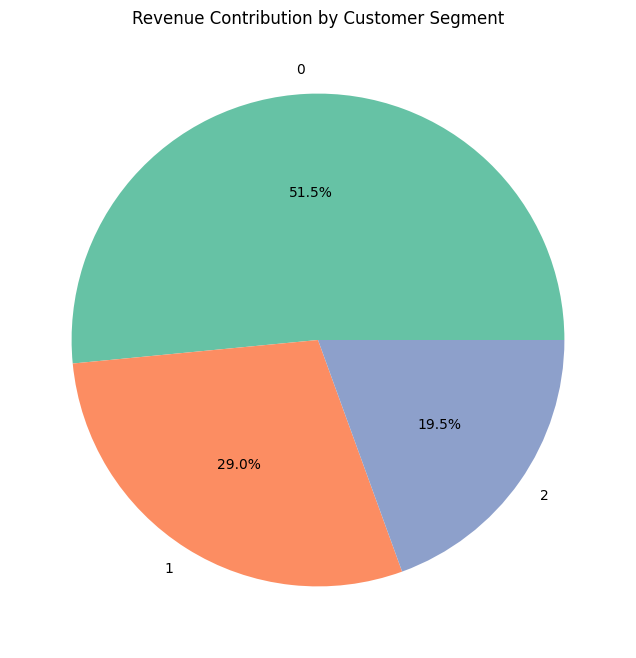

In [49]:
# Pie chart for the revenue contribution of each customer segment
plt.figure(figsize=(8, 8))
plt.pie(revenue_by_segment['Total Revenue'], labels=revenue_by_segment['Customer Segment'], 
        autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Revenue Contribution by Customer Segment')
plt.show()

/tmp/ipykernel_206/1718470849.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




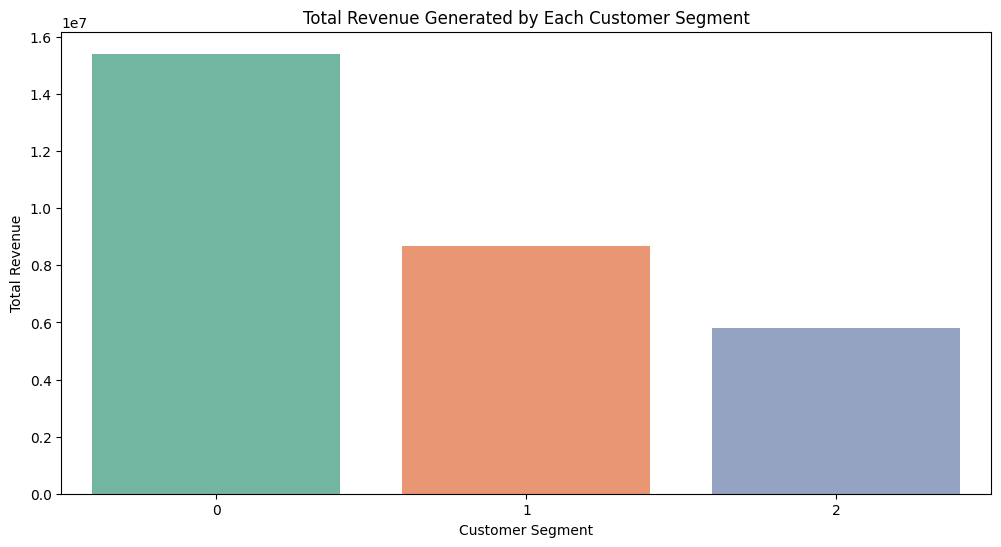

In [50]:
# Bar chart to compare revenue by segment
plt.figure(figsize=(12, 6))
sns.barplot(data=revenue_by_segment, x='Customer Segment', y='Total Revenue', palette='Set2')
plt.title('Total Revenue Generated by Each Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Revenue')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a87b5ed8-affe-4593-b21f-81cacee1bc3e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>